In [1]:
import torch
import numpy as np
import d2lzh_pytorch as d2l

In [2]:
n_train, n_test, true_w, true_b = 100, 100, [1.2, -3.4, 5.6], 5
features = torch.randn((n_train + n_test), 1) # x
poly_features = torch.cat((features, torch.pow(features, 2), torch.pow(features, 3)), 1) # x, x^2, x^3

labels = (true_w[0] * poly_features[:,0] + true_w[1] * poly_features[:,1] + true_w[2] * poly_features[:,2] + true_b) # y
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float) # noise

In [3]:
labels.size()

torch.Size([200])

In [4]:
features[:2], poly_features[:2], labels[:2]

(tensor([[-0.4548],
         [ 1.3925]]),
 tensor([[-0.4548,  0.2068, -0.0941],
         [ 1.3925,  1.9391,  2.7001]]),
 tensor([ 3.2346, 15.2032]))

In [5]:
num_epochs, loss = 100, torch.nn.MSELoss()

def fit_and_plot(train_features, test_features, train_labels, test_labels):
    net = torch.nn.Linear(train_features.shape[-1], 1)
    
    batch_size = min(10, train_labels.shape[0])
    dataset = torch.utils.data.TensorDataset(train_features, train_labels)
    train_iter = torch.utils.data.DataLoader(dataset, batch_size, shuffle=True)
    
    optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X), y.view(-1, 1))
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
        train_labels = train_labels.view(-1, 1)
        test_labels = test_labels.view(-1, 1)
        train_ls.append(loss(net(train_features), train_labels).item())
        test_ls.append(loss(net(test_features), test_labels).item())
        
    print('final epoch: train loss', train_ls[-1], 'test loss', test_ls[-1])
    d2l.semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
             range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('weight:', net.weight.data, '\nbias:', net.bias.data)

final epoch: train loss 0.0001289195497520268 test loss 0.00011864311818499118
weight: tensor([[ 1.2019, -3.3999,  5.5986]]) 
bias: tensor([4.9994])


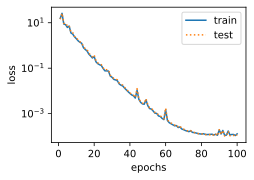

In [6]:
fit_and_plot(poly_features[:n_train, :], poly_features[n_train:, :], labels[:n_train], labels[n_train:])

final epoch: train loss 224.0507354736328 test loss 255.73045349121094
weight: tensor([[18.7712]]) 
bias: tensor([2.7996])


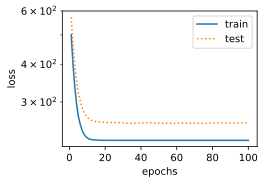

In [7]:
fit_and_plot(features[:n_train, :], features[n_train:, :], labels[:n_train], labels[n_train:])

final epoch: train loss 0.26917189359664917 test loss 95.464111328125
weight: tensor([[0.7718, 1.9434, 2.8413]]) 
bias: tensor([2.7177])


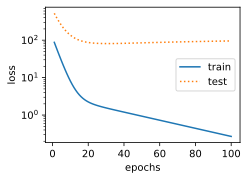

In [8]:
fit_and_plot(poly_features[0:2, :], poly_features[n_train:, :], labels[0:2], labels[n_train:])